In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from shutil import copy
import os, stat
import skimage
import cv2
from PIL import Image
from skimage import exposure
import scipy.misc
from skimage import io
import pylab as pl
import glob
import pydicom
from PIL import ImageFilter
import cv2
import numpy as np
import scipy
from scipy.misc import imread
import pickle as pickle
import random
import os
import matplotlib.pyplot as pl
import scipy.ndimage as ndi

In [2]:
directory="F://Overall dataset"

newdir="F://newdata"

In [3]:
protocols=[1,2,3]

In [4]:
def renmame(rename =False):
    if (rename ==True):
         for person in os.listdir(directory):
                for fol in os.listdir(os.path.join(directory,  person)):
                    for protocol in os.listdir(os.path.join(directory, person,fol)):
                        if (int(protocol[-3]) in  protocols):
                            for file in os.listdir(os.path.join(directory, person,fol,protocol)):
                                filen=file.replace(person+" - ","")
                                filename=os.path.join(directory,person,fol,protocol,file)
                                newfilename=os.path.join(directory,person,fol,protocol,filen)
                                os.rename(filename,newfilename)

In [5]:
def clean(clean =False):
    if(clean ==True):
        if(not os.path.exists(newdir)):
            os.mkdir(newdir)
        for person in os.listdir(directory):
            for fol in os.listdir(os.path.join(directory,  person)):
                for protocol in os.listdir(os.path.join(directory, person,fol)):
                    if (int(protocol[-3]) in  protocols):
                        for file in os.listdir(os.path.join(directory, person,fol,protocol)):
                            filename=os.path.join(directory,person,fol,protocol,file)
                            newfilename=os.path.join(directory,person,fol,protocol,person+" - "+file)
                            os.rename(filename,newfilename)
                            if (not os.path.isdir(os.path.join(newdir,protocol))):
                                os.mkdir(os.path.join(newdir,protocol))
                            copy(newfilename,os.path.join(newdir,protocol))                     

In [6]:
renmame(rename=False)

In [7]:
%time clean(clean=False)


Wall time: 0 ns


In [8]:
def condcm2jpg(folder_path, convert =False):
    if (convert == True):
        PNG = False
    # Specify the output jpg/png folder path
        jpg_folder_path = folder_path

        images_path = os.listdir(folder_path)
        for n, image in enumerate(images_path):
            imageo=image
            ds = pydicom.dcmread(os.path.join(folder_path, image))
            pixel_array_numpy = ds.pixel_array
            if PNG == False:
                image = image.replace('.dcm', '.jpg')
            else:
                image = image.replace('.dcm', '.png')
            cv2.imwrite(os.path.join(jpg_folder_path, image), pixel_array_numpy)
            if n % 100 == 0:
                print('{} image converted'.format(n))
            os.remove(os.path.join(folder_path,imageo))
def conver(conv = True):
    if(conv):
        for fol in os.listdir(newdir):
            condcm2jpg(os.path.join(newdir,fol),True)
%time conver(conv=False)       

Wall time: 0 ns


In [9]:
def perfectbin(folder):
    "to create a perfect binary mask of the image"
    for images in os.listdir(folder):
        filename =os.path.join(folder,images)
        image=io.imread(filename)
        bit=image
        bit[bit<128]=0
        bit[bit>128]=1
      
        plt.imsave(fname=(filename),arr=bit,cmap="gray")

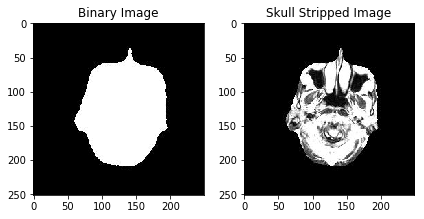

In [10]:
##Perfect Binary Image
fig=plt.figure()
plt.subplot(1,2,1)
plt.imshow(io.imread("F://newdata/1  T2W-FLAIR - 301 binary//binaryBS.050170 - IM-0003-0001-0001.jpg"),cmap='gray')
plt.title("Binary Image")
plt.subplot(1,2,2)
plt.imshow(io.imread("F://newdata//1  T2W-FLAIR - 301 skull stripped/BS.050170 - IM-0003-0001-0001.jpg"),cmap="gray")
plt.title("Skull Stripped Image")
plt.tight_layout()
plt.show()

In [11]:
newdir = "F://newdata//1  T2W-FLAIR - 301 skull stripped"
binary="F://newdata/1  T2W-FLAIR - 301 binary"

In [12]:
def noise_filtering(img_location):
    im=Image.open(img_location)
    im1 = im.filter(ImageFilter.MedianFilter(size=3))
    return np.array(im1)
# Contrast stretching
def con_stretch(img):

    p2, p98 = np.percentile(img, (10, 98))
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    return img_rescale

# Equalization
def img_equ(img):
    img_eq = exposure.equalize_hist(img)
    return img_eq
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return img.point(contrast)
def enhance(Image,en=True):
    if(en==True):
        con=15
        Image = Image.filter(ImageFilter.MedianFilter(size=3))#NOISE FILTERING
        imq=change_contrast(Image,con)# increase the contrast
        #imq=imq.filter(ImageFilter.SHARPEN) #Sharpen the image
        imq=imq.filter(ImageFilter.SHARPEN)
        imq=change_contrast(imq,con)
        imq=np.array(imq)
        
        #imq=exposure.equalize_hist(imq)
        imq=con_stretch(imq)
        return imq
    else:
        return "stupidity"

## Example of image conversion

(256, 256)
(251, 249)
(251, 249)


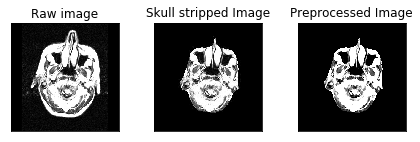

In [13]:
norm= io.imread("F://newdata//1  T2W-FLAIR - 301/BS.050170 - IM-0003-0001-0001.jpg")
print(norm.shape)
im = Image.open("F://newdata//1  T2W-FLAIR - 301 skull stripped/BS.050170 - IM-0003-0001-0001.jpg")
print(np.array(im).shape)
im1=enhance(Image.open("F://newdata//1  T2W-FLAIR - 301 skull stripped/BS.050170 - IM-0003-0001-0001.jpg"))
print(im1.shape)
plt.figure()
fig = plt.subplot(1 ,3, 1)
plt.imshow(np.array(norm), cmap=plt.cm.gray)
plt.title("Raw image")
plt.xticks(())
plt.yticks(())
fig = plt.subplot(1 ,3, 2)
plt.imshow(np.array(im), cmap=plt.cm.gray)
plt.title("Skull stripped Image")
plt.xticks(())
plt.yticks(())
fig =plt.subplot(1,3,3)
plt.imshow(im1,cmap="gray")
plt.title("Preprocessed Image")
plt.xticks(())
plt.yticks(())
plt.tight_layout()
plt.show()

In [14]:
#We dont do psuedocoloring
def psucol(img):
    im_gray=np.array(img)
    im_color = cv2.applyColorMap(im_gray, cv2.COLORMAP_JET)
    return Image.fromarray(im_color)

In [15]:

def getcoordinates(bin_img_location):
    #get the coordinates for the cropping
    
    im=io.imread(bin_img_location)
    coord =np.argwhere(im != 0)
    min_left_coord=248
    for x in coord:
        if(x[1]<min_left_coord):
            min_left_coord=x[1]
    max_right_coord=0
    for x in coord:
        if(x[1]>max_right_coord):
            max_right_coord=x[1]
    upper_coord=coord[0][0]
    bottom_coord=coord[-1][0]
    return (min_left_coord,upper_coord,max_right_coord,bottom_coord)

def crop_image(img_location,bin_img):
    #cropping the black out part of the image
    im=Image.open(img_location)
    
    img2 = im.crop(getcoordinates(bin_img))
    return np.array(img2)

def power(image):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return image

## We are preprocessing the image by denoising, increasing the contrast, sharpening and equalising the image

In [16]:
cont15="F://newdata//301ss enhanced_contstretch"

if(not os.path.isdir(cont15)):
    os.mkdir(cont15)

In [17]:
def makefol(make=False):
    if(make==True):
        for file in os.listdir(newdir):
            img =Image.open(os.path.join(newdir,file))
            bin1=Image.open(os.path.join(binary,"binary"+file))
            kite=bin1==0
            img1=enhance(img)
            ##imgp=psucol(img1)
            img1[kite]=0
            scipy.misc.imsave(os.path.join(cont15,file), img1)
            

In [18]:
%time makefol(make=False)

Wall time: 0 ns


## Plotting the histogram

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


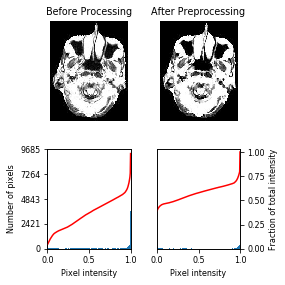

In [26]:
def plot(img,binim,title):
    img=io.imread(img)
    binim=io.imread(binim)
    binim=binim.ravel()
    kite=binim!=0
    plt.hist(img.ravel()[kite],200,[5,250]);
    plt.title(title);
    plt.xlabel("Pixel Value")
    plt.ylabel("Pixel Intensity")
   # print(img.ravel()[kite].shape)
    return plt
sample_img="F://newdata//1  T2W-FLAIR - 301 skull stripped/BS.050170 - IM-0003-0001-0001.jpg"
sample_preImg="F://newdata//301ss enhanced_contstretch/BS.050170 - IM-0003-0001-0001.jpg"
bin_img="F://newdata//1  T2W-FLAIR - 301 binary/binaryBS.050170 - IM-0003-0001-0001.jpg"
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    
    print(type(axes))
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()
    
    image = crop_image(image,bin_img)
    image = img_as_float(image)
    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    #ax_hist.ticklabel_format(axis='y', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf,'r')
    ax_cdf.set_yticks([])
    #print(type(ax_cdf))

    return ax_img, ax_hist, ax_cdf


# Display results
fig = plt.figure(figsize=(4,4))
axes = np.zeros((2, 2), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 2, 1)
for i in range(1, 2):
    axes[0, i] = fig.add_subplot(2, 2, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 2):
    axes[1, i] = fig.add_subplot(2, 2, 3+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(sample_img, axes[:, 0])
ax_img.set_title('Before Processing')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(sample_preImg, axes[:, 1])
ax_img.set_title('After Preprocessing')

#ax_img, ax_hist, ax_cdf = plot_img_and_hist(im1, axes[:, 2])
#ax_img.set_title('Histogram equalization')

#ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
#ax_img.set_title('Adaptive equalization')""

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

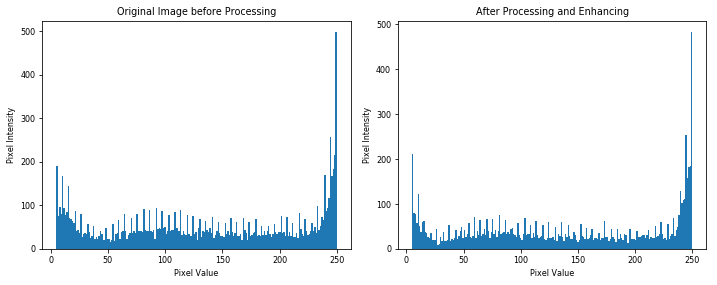

In [24]:
binim=io.imread("F://newdata/1  T2W-FLAIR - 301 binary//binaryBS.050170 - IM-0003-0001-0001.jpg")
fig =plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot(sample_img,bin_img,"Original Image before Processing")
plt.subplot(1,2,2)
plot(sample_preImg,bin_img,"After Processing and Enhancing")
#We find that doing the processing the image histogram is distributed 
plt.tight_layout()
plt.show()

## Extracting the gabor features

In [100]:
from scipy.stats import entropy as scipy_entropy


def shannon_entropy(image, base=2):
    """Calculate the Shannon entropy of an image.
    The Shannon entropy is defined as S = -sum(pk * log(pk)),
    where pk are frequency/probability of pixels of value k.
    Parameters
    ----------
    image : (N, M) ndarray
        Grayscale input image.
    base : float, optional
        The logarithmic base to use.
    Returns
    -------
    entropy : float
    Notes
    -----
    The returned value is measured in bits or shannon (Sh) for base=2, natural
    unit (nat) for base=np.e and hartley (Hart) for base=10.
    References
    ----------
    .. [1] https://en.wikipedia.org/wiki/Entropy_(information_theory)
    .. [2] https://en.wiktionary.org/wiki/Shannon_entropy
    Examples
    --------
    >>> from skimage import data
    >>> shannon_entropy(data.camera())
    7.0479552324230861
    """

    _, counts = unique(image, return_counts=True)
    return scipy_entropy(counts, base=base)

In [101]:
# define gabor filter bank with different orientations and at different scales
def build_filters():
    filters = []
    ksize = 9
    #define the range for theta and nu
    for theta in np.arange(0, np.pi, np.pi / 8):
        for nu in np.arange(0, 6*np.pi/4 , np.pi / 4):
            kern = cv2.getGaborKernel((ksize, ksize), 1.0, theta, nu, 0.5, 0, ktype=cv2.CV_32F)
            kern /= 1.5*kern.sum()
            filters.append(kern)
    return filters

#function to convolve the image with the filters
""""def process(img, filters):
    
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum  """""
def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(image, kernel, mode='wrap')
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats


#
def gabor(imgg):
    #instantiating the filters
    filters = build_filters()

    f = np.asarray(filters)

    #reading the input image
    #imgg = cv2.imread(filename,0)
    image= power(imgg)
    #initializing the feature vector
    feat = []

    #calculating the local energy for each convolved image
    for k, kernel in enumerate(f):
        filtered = ndi.convolve(image, kernel, mode='wrap')
        feat.append( filtered.mean())
        feat.append(filtered.var())
        feat.append(shannon_entropy(filtered))
    return np.array(feat)
    #fet matrix is the feature vector for the image
newdir=cont15

# Extracting Gabor Features

In [107]:
binim="F://newdata/1  T2W-FLAIR - 301 binary"
def gbor():
    for file in os.listdir(newdir):
        bin_img=os.path.join(binim,"binary"+file)
        fileadd=os.path.join(newdir,file)
        images.append(file[0:-4])
        cropped_img=crop_image(fileadd,bin_img)
       # print(file+" feature extracted")
        gfeats.append(gabor(cropped_img))
        
      

In [114]:
Recreate = True
if((not os.path.isfile("F://gaborfeatures1.csv") )or Recreate):
    images=[]
    gfeats=[]
    gbor()
    gfeats=np.array(gfeats)
    print(gfeats.shape)
    images=np.array(images)
    col=["name"]
    for x in range(1,gfeats.shape[1]):
        col.append("gabf"+str(x))
    gaborf =pd.DataFrame(columns=col)
    gaborf["name"]=images
    for index,z in enumerate(col[1:]):
        gaborf[z]=gfeats[:,index]
    gaborf.to_csv("F://gaborfeatures1.csv")
else :
    gaborf =pd.read_csv("F://gaborfeatures1.csv",index_col=0)

(824, 144)


In [138]:
gaborf.head(2)
##Removing the columns with zero values
gaborf=gaborf.loc[:, (gaborf != 0).any(axis=0)]
gaborf.head(2)

,name,gabf4,gabf5,gabf6,gabf7,gabf8,gabf9,gabf10,gabf11,gabf12,...,gabf134,gabf135,gabf136,gabf137,gabf138,gabf139,gabf140,gabf141,gabf142,gabf143
0,BS.050170 - IM-0003-0001-0001,1.520516e-16,0.442175,11.889257,1.216413e-16,0.732249,11.889955,-2.128723e-16,2.064032,11.890290,...,11615.584937,11.891934,-8.688665e-17,1.252484,11.891552,1.477073e-16,0.482038,11.891552,7.385365e-17,0.414111
1,BS.050170 - IM-0003-0002-0001,7.218212e-17,0.446623,12.753780,9.624283e-18,0.767255,12.753441,-1.443642e-16,2.193499,12.753691,...,13478.548743,12.755209,3.368499e-17,1.343801,12.754891,9.624283e-17,0.488309,12.755125,1.154914e-16,0.411645


In [139]:
X=gaborf.iloc[:,1:];
X = X.loc[:, (X != 0).any(axis=0)]
cor=X.corr()
cor.head(5)

,gabf4,gabf5,gabf6,gabf7,gabf8,gabf9,gabf10,gabf11,gabf12,gabf13,...,gabf134,gabf135,gabf136,gabf137,gabf138,gabf139,gabf140,gabf141,gabf142,gabf143
gabf4,1.000000,0.011298,0.019306,0.241519,0.041436,0.019362,0.162842,0.033556,0.019293,0.342596,...,0.038616,0.019073,0.261353,0.041608,0.019068,0.355088,0.023297,0.019107,0.372095,-0.033569
gabf5,0.011298,1.000000,0.294895,0.028823,0.220135,0.294908,-0.005009,0.142575,0.294723,0.031004,...,-0.427616,0.294334,-0.003369,-0.227494,0.294428,0.038857,0.309583,0.294414,0.048621,0.733733
gabf6,0.019306,0.294895,1.000000,0.020134,-0.187024,0.999999,0.011667,-0.203721,0.999999,0.009074,...,-0.379088,0.999993,0.028071,-0.299398,0.999994,-0.043964,-0.062856,0.999994,0.021275,0.390144
gabf7,0.241519,0.028823,0.020134,1.000000,0.012179,0.020217,0.153585,0.014900,0.020201,0.289126,...,0.004187,0.020302,0.262340,0.005551,0.020254,0.296437,0.025061,0.020236,0.314502,0.024997
gabf8,0.041436,0.220135,-0.187024,0.012179,1.000000,-0.187115,0.036249,0.991725,-0.187155,0.002415,...,0.704887,-0.187322,-0.026681,0.825551,-0.187290,-0.017282,0.770991,-0.187311,0.025868,-0.452252


In [121]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [132]:
X=pca.transform(X)


## As we can see a lot of variables with coorelation >0.5 so we choose a reduction of features such that Coorealation is <0.5. Dimensions exhibiting higher correlation can lower down the performance of model. Moreover, it is not good to have multiple variables of similar information or variation also known as “Multicollinearity”.Variables having higher value ( VIF > 5 ) can be dropped.

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [141]:
print("shape of X is ",X.shape)
%time X=calculate_vif_(X)
print("New shape of X is ",X.shape)

shape of X is  (824, 119)
dropping 'gabf77' at index: 61
dropping 'gabf99' at index: 79
dropping 'gabf63' at index: 50
dropping 'gabf5' at index: 1
dropping 'gabf96' at index: 74
dropping 'gabf60' at index: 46
dropping 'gabf27' at index: 19
dropping 'gabf132' at index: 100
dropping 'gabf135' at index: 102
dropping 'gabf24' at index: 16
dropping 'gabf66' at index: 48
dropping 'gabf102' at index: 74
dropping 'gabf117' at index: 85
dropping 'gabf105' at index: 76
dropping 'gabf33' at index: 23
dropping 'gabf36' at index: 25
dropping 'gabf30' at index: 20
dropping 'gabf69' at index: 47
dropping 'gabf72' at index: 49
dropping 'gabf48' at index: 32
dropping 'gabf138' at index: 93
dropping 'gabf51' at index: 34
dropping 'gabf84' at index: 54
dropping 'gabf54' at index: 36
dropping 'gabf108' at index: 69
dropping 'gabf123' at index: 79
dropping 'gabf120' at index: 76
dropping 'gabf42' at index: 26
dropping 'gabf87' at index: 54
dropping 'gabf126' at index: 78
dropping 'gabf81' at index: 49
dro

In [142]:
X_new=X
print("New shape of X is ",X_new.shape)
cor=X_new.corr()
cor.head(5)

New shape of X is  (824, 41)


,gabf4,gabf7,gabf10,gabf13,gabf16,gabf22,gabf25,gabf28,gabf31,gabf34,...,gabf112,gabf115,gabf118,gabf121,gabf124,gabf130,gabf133,gabf136,gabf139,gabf142
gabf4,1.000000,0.241519,0.162842,0.342596,0.313030,-0.017755,-0.000955,0.278518,0.347622,0.391761,...,0.283186,-0.010921,0.207839,0.297848,0.346141,-0.029231,-0.025250,0.261353,0.355088,0.372095
gabf7,0.241519,1.000000,0.153585,0.289126,0.337009,0.002362,-0.037296,0.257946,0.322581,0.345320,...,0.295446,-0.000536,0.170958,0.264478,0.293235,0.026337,-0.053447,0.262340,0.296437,0.314502
gabf10,0.162842,0.153585,1.000000,0.236040,0.163919,-0.049132,0.007900,0.176243,0.224690,0.213066,...,0.155960,0.010944,0.141083,0.173420,0.188385,-0.008588,0.037713,0.109882,0.220705,0.193866
gabf13,0.342596,0.289126,0.236040,1.000000,0.377857,-0.016698,-0.008895,0.292498,0.359999,0.404273,...,0.312134,-0.004498,0.166183,0.367816,0.326805,0.018976,-0.000239,0.267297,0.379462,0.384223
gabf16,0.313030,0.337009,0.163919,0.377857,1.000000,0.035960,-0.016542,0.289200,0.373704,0.446795,...,0.317709,-0.003354,0.238920,0.311565,0.347771,-0.033094,-0.035219,0.271962,0.351003,0.381751


In [143]:
X_new["name"]=images
col=X_new.columns.tolist()
col=col[-1:]+col[:-1]
X_new=X_new[col]


In [144]:
X_new.head()

,name,gabf4,gabf7,gabf10,gabf13,gabf16,gabf22,gabf25,gabf28,gabf31,...,gabf112,gabf115,gabf118,gabf121,gabf124,gabf130,gabf133,gabf136,gabf139,gabf142
0,BS.050170 - IM-0003-0001-0001,1.520516e-16,1.216413e-16,-2.128723e-16,1.911506e-16,1.390186e-16,-4.631058e-15,-1.644330e-14,1.737733e-16,9.991965e-17,...,1.086083e-16,8.514892e-16,-4.344333e-18,3.475466e-17,-5.647632e-17,1.559615e-15,-3.649239e-15,-8.688665e-17,1.477073e-16,7.385365e-17
1,BS.050170 - IM-0003-0002-0001,7.218212e-17,9.624283e-18,-1.443642e-16,-4.812141e-17,2.887285e-17,4.124005e-15,-1.692911e-14,9.624283e-17,5.293355e-17,...,6.255784e-17,3.281880e-15,2.117342e-16,8.661854e-17,4.812141e-17,1.655377e-15,-3.719785e-15,3.368499e-17,9.624283e-17,1.154914e-16
2,BS.050170 - IM-0003-0003-0001,7.699426e-17,2.839163e-16,1.299278e-16,0.000000e+00,-3.368499e-17,7.795669e-16,-7.372200e-15,9.624283e-17,-4.812141e-18,...,1.924857e-17,1.003331e-14,-1.299278e-16,4.330927e-17,1.058671e-16,-6.111419e-16,1.207847e-14,-2.887285e-17,4.812141e-18,4.812141e-17
3,BS.050170 - IM-0003-0004-0001,-1.924857e-17,-8.661854e-17,-1.780492e-16,-2.406071e-17,0.000000e+00,-5.630205e-16,-1.104868e-14,-7.218212e-17,3.849713e-17,...,-5.293355e-17,1.005738e-14,3.849713e-17,-9.624283e-18,-1.395521e-16,-1.785304e-15,1.824283e-14,-6.736998e-17,6.736998e-17,9.624283e-18
4,BS.050170 - IM-0003-0005-0001,-7.268689e-17,-1.317450e-16,-1.044874e-16,1.590026e-17,-1.362879e-16,2.952905e-17,-1.581394e-14,-1.022159e-16,5.905810e-17,...,3.407198e-17,-2.278280e-15,2.952905e-17,-3.180051e-17,6.360103e-17,1.635455e-16,5.415173e-15,8.631568e-17,0.000000e+00,1.590026e-17


In [145]:
X_new.to_csv("F://dimension_reduced_features.csv")
data =pd.read_csv("F://dimension_reduced_features.csv",index_col=0)
data.head(2)
data =data.sort_values(["name"],ascending=1)

In [146]:
count_img=pd.read_csv('F://count_img.csv',index_col=0)
count_img.tail(5)

,folder,no. of Images,GT
34,SE.231070,24,0
35,SE.261168,20,0
36,SM.020690,20,0
37,SS.111270,22,0
38,VS.241067,20,1


In [147]:
y=[]
for k in count_img.index:
    number= count_img.loc[k,["no. of Images"]].values[0]
    GT = count_img.loc[k,["GT"]].values[0]
    for x in range(0,number):
        y.append(GT)
y=np.array(y)

In [148]:
data["GT"]=y


In [149]:
X=data.drop(["name","GT"],axis=1)

In [150]:
print("shape of X :", X.shape)
print("shape of y :",y.shape)

shape of X : (824, 41)
shape of y : (824,)


In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
print(X_train.shape)

(659, 41)


In [166]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [193]:
print(X_train.shape)

(659, 41)


In [214]:
len(y_test[y_test==1])
len(y_train[y_train==0])

552

In [217]:
from sklearn import svm
SVC =svm.SVC(C=1,kernel="linear",gamma='scale')
SVC.fit(X_train,y_train)
print("testing Score :" ,SVC.score(X_test,y_test))
print("training score:",SVC.score(X_train,y_train))

testing Score : 0.7515151515151515
training score: 0.8376327769347496


In [199]:
y_pred=SVC.predict(X_test)
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[124   0]
 [ 41   0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


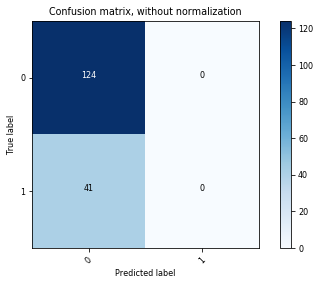

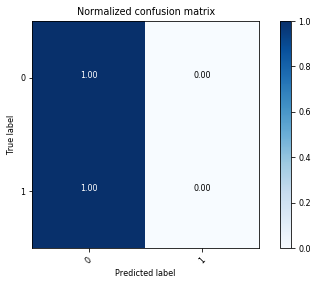

In [203]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
class_names=[0,1]
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [205]:
for x, value in enumerate(y_pred):
    if(x==y_test[x]):
        print(x)

0


In [207]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [202]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [178]:
from sklearn.feature_selection import SelectKBest, f_regression

sel=SelectKBest(f_regression, k=2)
X_train=sel.fit_transform(X_train, y_train)
X_test=sel.transform(X_test)

In [179]:
X_train.shape

(659, 2)

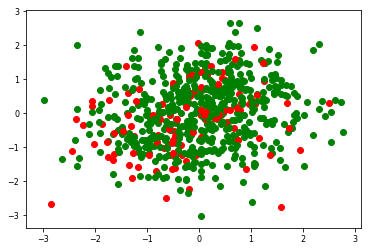

In [163]:
for x in range(len(X_train)):
    if(y_train[x]==1):
        color="red"
        
    else:
        color ="green"
    plt.scatter(X_train[x][0],X_train[x][1],c=color)

# Extracting Kaze features

In [303]:
# Feature extractor
binim="F://newdata/1  T2W-FLAIR - 301 binary"
def extract_features(image, vector_size=32):
    #image = imread(image_path, mode="L")
    plt.imshow(image)
    try:
        # Using KAZE, cause SIFT, ORB and other was moved to additional module
        # which is adding addtional pain during install
        alg = cv2.KAZE_create()
        # Dinding image keypoints
        kps = alg.detect(image)
        # Getting first 32 of them. 
        # Number of keypoints is varies depend on image size and color pallet
        # Sorting them based on keypoint response value(bigger is better)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        # computing descriptors vector
        kps, dsc = alg.compute(image, kps)
        # Flatten all of them in one big vector - our feature vector
        dsc = dsc.flatten()
        # Making descriptor of same size
        # Descriptor vector size is 64
        needed_size = (vector_size * 64)
        if dsc.size < needed_size:
            # if we have less the 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
    except cv2.error as e:
        print ('Error: ', e)
        return None

    return dsc

result={}
def batch_extractor(images_path):#, pickled_db_path="features.pck"):
    for file in os.listdir(images_path):
        bin_img=os.path.join(binim,"binary"+file)
        fileadd=os.path.join(newdir,file)
        #images.append(file[0:-4])
        cropped_img=crop_image(fileadd,bin_img)
        result[file] = extract_features(f)
    print("Feautures Extracted")
    # saving all our feature vectors in pickled file
    #with open(pickled_db_path, 'w') as fp:
       # pickle.dump(result, fp)

SyntaxError: 'break' outside loop (cell_name, line 9)

Figure(432x288)


TypeError: Image data cannot be converted to float

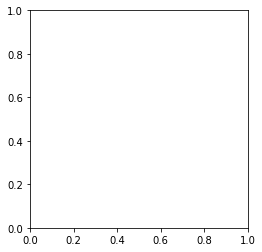

In [304]:
def show_img(path):
    img = imread(path, mode="RGB")
    plt.imshow(img)
    plt.show()
    
def run():
    images_path =newdir
    files = [os.path.join(images_path, p) for p in sorted(os.listdir(images_path))]
    # getting 3 random images 
    sample = random.sample(files, 3)
    
    batch_extractor(images_path)
%time run()

In [284]:
newdir
name = f.split('/')[-1].lower()

'F://newdata//301ss enhanced_contstretch'

In [281]:
names=[]
features=[]
for x in result:
    name=x[15:]
    feature=result[x]
    names.append(name[:-4])
    features.append(feature)
    
names=np.array(names)
features=np.array(features)
print(names.shape)
print(features.shape)


(0,)
(0,)


In [282]:

data=pd.DataFrame()
data["Image"]=names
for x in range(2048):
    feat= features[:,x]
    data["feature "+str(x)]=feat
data.head(1)

IndexError: too many indices for array

In [277]:
data.to_csv("F://keypointsfeatures.csv")
#data2=pd.read_csv("F://gaborfeatures1.csv")
#data1=pd.concat([data,data2],axis=1,join_axes=[data.index])
#data1=data1.drop(["Unnamed: 0"],axis=1)
#data1.shape

(824, 2130)

In [289]:
data1.shape

(824, 2129)

In [288]:
data1.iloc[[1],[-81]]
data1=data1.drop(["Unnamed: 0"],axis=1)

In [290]:
data1.to_csv("F://total_feat.csv")

In [92]:
import numpy as np
from skimage import io, color, img_as_ubyte
from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics.cluster import entropy

rgbImg = io.imread('https://i.stack.imgur.com/1xDvJ.jpg')
grayImg = img_as_ubyte(color.rgb2gray(rgbImg))
#grayImg=np.array(im)
distances = [1, 2, 3]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
properties = ['energy', 'homogeneity']

glcm = greycomatrix(grayImg, 
                    distances=distances, 
                    angles=angles,
                    symmetric=True,
                    normed=True)

feats = np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])

C:\Users\pranav\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [87]:
np.array(im)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [67]:
np.set_printoptions(precision=4)


In [94]:
print(len(feats))

24


C:\Users\pranav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


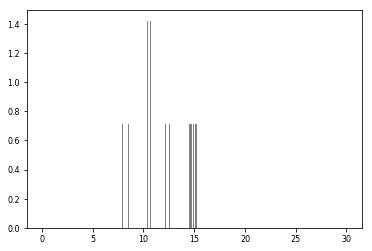

In [93]:
from skimage.feature import greycomatrix, greycoprops
dis = (greycoprops(glcm, 'dissimilarity'))
plt.hist(dis.ravel(), normed=True, bins=256, range=(0, 30),facecolor='0.5');plt.show()

